# DADOS QUANTITATIVOS DISCRETOS

In [11]:
%matplotlib inline

from pandas.tools.plotting import scatter_matrix
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# tabelas de teste: cotacao_dolar, pesos, velocidade_internet
NOME_TABELA = 'teste'

# velocidade, pesos, cotacao
COLUNA = 'teste'
TABELA = 'dataset/quantitativos/'+NOME_TABELA+'.csv'

dataset = pd.read_csv(TABELA)
dataset = dataset[COLUNA]

# Usando pandas para criar a series de numeros
ordenados = sorted(dataset)
data = pd.Series(ordenados)

# Montando a tabela de distribuição de frequência

#math.ceil arrendonda arredonda para o número inteiro mais próximo em direção ao infinito positivo
tamanho = len(data)
valor_minimo = min(data)
valor_maximo = max(data)

#amplitude = data.max() - data.min()
amplitude = valor_maximo - valor_minimo
qnt_classe = math.ceil(math.sqrt(tamanho))
#k = 1 + 3.33* (math.log(amplitude,10))
#qnt_classe = math.ceil(1 + 3.33* (math.log(amplitude,10)))

intervalo = round(amplitude / qnt_classe,2)

# Intervalos
inicial = valor_minimo

#Meu Proprio intervalo para recorte dos dados
intervalos = []
for i in range(qnt_classe + 1):
    intervalos.append(inicial)
    inicial+= intervalo

#print(intervalos)
print("Quantidade de classes: " , qnt_classe)
print("Intervalo: ", intervalo)

df = pd.DataFrame(data,columns=['Classes'])

s, bins = pd.cut(pd.Series(df['Classes']), bins = qnt_classe, retbins=True)

# Valores da classe
#print(bins)

ponto_medio = [(a + b) /2 for a,b in zip(bins[:-1], bins[1:])]
#print(ponto_medio)

#Agrupando dados para contagem
factor = pd.cut(df['Classes'],bins=qnt_classe)
frequencia = df.groupby(factor)['Classes'].agg(['count'])
#print(frequencia)

#Salvando tabela inicial
frequencia.to_csv('dataset_gerados/quantitativos/tabela_auxiliar.csv')
dataset_df = pd.read_csv('dataset_gerados/quantitativos/tabela_auxiliar.csv')

# Calculando a frequencia acumulada
frequencia = dataset_df['count']
dataset_df.rename(columns={'count':'f'}, inplace=True)

# Frequencia relativa
f = sum(frequencia)
dataset_df['f%'] = dataset_df['f'] / f

# Frequencia acumulada
dataset_df['F'] = dataset_df['f'].cumsum ()
#print(dataset_df)

# Calcular a frequencia relativa acumulada
total = sum(frequencia)
dataset_df['F %'] = dataset_df['F'] / total
#dataset_df

# Ponto médio
dataset_df['xi'] = ponto_medio

# Frequencia ponto médio
dataset_df['xi.fi'] = dataset_df['xi'] * dataset_df['f']

# Ponto Médio ao quadrado
dataset_df['xi²'] = dataset_df['xi'] ** 2 

# Frequencia do Ponto Médio ao quadrado
dataset_df['xi².fi'] = dataset_df['xi²'] * dataset_df['f']
# dataset_df['XI².FI'] = dataset_df['XI²'].cumsum ()

new_df = pd.DataFrame(dataset_df)
new_df

#Salvando tabela inicial
new_df.to_csv('dataset_gerados/quantitativos/TOFPC.csv',index=False)
new_df

Quantidade de classes:  2
Intervalo:  1.5


,Classes,f,f%,F,F %,xi,xi.fi,xi²,xi².fi
0,"(0.997, 2.5]",2,0.5,2,0.5,1.7485,3.497,3.057252,6.114504
1,"(2.5, 4.0]",2,0.5,4,1.0,3.2500,6.500,10.562500,21.125000


# Histograma

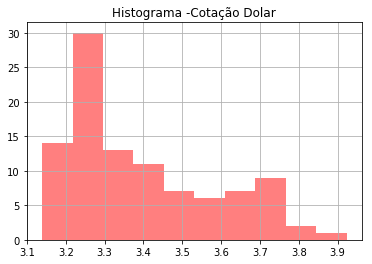

In [5]:
# MATPLOTLIB: Histograma (univariado)
TITULO_HISTOGRAMA = 'Histograma -Cotação Dolar'
COR_GRAFICO= 'Red'
SALVAR_GRAFICO_COMO = 'histograma_cotacao'

histograma_df = pd.Series(data) # Transformanda os dados em um serie
histograma_df.hist(alpha=0.5, color= COR_GRAFICO)
plt.title(TITULO_HISTOGRAMA)
plt.savefig('graficos/'+SALVAR_GRAFICO_COMO+'.png')
plt.show()

# Calculos da Tabela

In [6]:
import math

#Minimo
minimo = bins[0]

#Maximo
maximo = bins[-1]

# Media
f = new_df['f'].sum() 
xi_li = new_df['xi.fi'].sum()
media = xi_li / f

# Moda
index = new_df['f'].idxmax() # Maior valor da coluna de frequencia
moda_tabela = new_df['xi'][index]

# Mediana li + (hi * (Pmq - Fant)/fi)

#amplitude = intervalo
amplitude_classe = intervalo
posicao_mediana = f/2

F = new_df['F']

# Pegando a classe da mediana
def get_position(value):
    position = 0
    for i in F:
        if i <= value:
            position+=1
        else:
            break;
    return position

#classe = get_position(posicao)

def calc_mediana_tabela(valor):
    position = get_position(valor)
    # frequencia da classe
    fi = new_df['f'][position]
    # limite inferior da classe
    li = bins[position]
    # amplitude da classe
    hi = amplitude_classe
    # posicao da mediana
    Pmq = valor
    # posicao anterior da mediana
    Fant = F[position]
#     print("Posição: ", position)
#     print("Frrequencia: ", fi)
#     print("limite inferior: ", li)
#     print("amplitude: ", hi)
#     print("posição: ", Pmq)
#     print("posição anterior: ", Fant)
        
    return li + (hi * ((Pmq - Fant)/fi))

mediana = calc_mediana_tabela(posicao_mediana)

# Quartis
q1 = f/4
q2 = (f/4) * 2
q3 = (f/4) * 3

quartil1 = calc_mediana_tabela(q1)
quartil2 = calc_mediana_tabela(q2)
quartil3 = calc_mediana_tabela(q3)

# Variancia
fxi = new_df['xi.fi'].sum()
fixi2 = new_df['xi².fi'].sum()
variancia = (1/ (f-1)) * (fixi2 - ((fxi **2) / f))

# Desvio Padrão
desvio_padrao = math.sqrt(variancia)

# Coeficiente de variação
coeficiente_variacao = (desvio_padrao /  media) * 100

tabela_descritiva = pd.DataFrame({'Medidas': ["Minimo","Máximo","Média", "Moda","Mediana","Amplitude",
                                           "1° Quartil","2° Quartil","3° Quartil",
                                           "Variancia","Desvio Padrão","Coeficiente de Variação"],
                        
                       'Resultado': [minimo,
                                     maximo,  
                                     media, 
                                     moda_tabela,
                                     mediana,
                                     amplitude,                                    
                                     quartil1,
                                     quartil2,
                                     quartil3,
                                     variancia,
                                     desvio_padrao,
                                     coeficiente_variacao,
                                    ]})
tabela_descritiva

,Medidas,Resultado
0,Minimo,3.138617
1,Máximo,3.922900
2,Média,3.395550
3,Moda,3.256925
4,Mediana,3.253023
5,Amplitude,0.783500
6,1° Quartil,3.167083
7,2° Quartil,3.253023
8,3° Quartil,3.451150
9,Variancia,0.035846


### Calculo de dados brutos

In [10]:
# amplitude, variancia, desvio padrão, coeficiente de variação
import math

PERCENTIL = 63

# Variancia Populacional
def varianciaPopulacional(data):
    tamanho = len(data)
    media = data.mean()
    soma = 0
    
    for valor in data:
        soma += math.pow( (valor - media ), 2)
     
    return soma / float(tamanho)


# Variancia Amostral
def varianciaAmostral(data):
    tamanho = len(data)
    somaDados = sum(data)

    soma1 = 0
    soma2 = (math.pow(somaDados, 2)) / tamanho
    
    for valor in dataset:
        soma1 += math.pow((valor),2)
        
    return (soma1 - soma2) / float((tamanho - 1))

def desvioPadrao(data):
    return math.sqrt(data)

media = data.mean()
moda = data.mode()

variancia_populacional = varianciaPopulacional(data)
variancia_amostral = varianciaAmostral(data)

desvio_padrao_amostral = desvioPadrao(variancia_populacional)
desvio_padrao_populacional = desvioPadrao(variancia_amostral)

percentil = np.percentile(data,PERCENTIL)

soma = sum(data)
maximo = max(data)
minimo = min(data)
amplitude = maximo - minimo

if(moda.count() % 2 == 0):
    moda = (moda[0] + moda[1])/2

descritiva = pd.DataFrame({'Medidas': ["Mínimo", "Máximo", "Média", 
                                       "Moda", "1° Quartil","2° Quartil",
                                       "3° Quartil","Percentil", "Amplitude",
                                       "Variancia (Amostral)","Variancia (Populacional)","Desvio Padrão(Amostral)",
                                         "Desvio Padrão (Populacional)","Coeficiente de Variação"],
                        
                       'Resultado': [data.min(), 
                                     data.max(),
                                     media,
                                     moda,                                    
                                     data.quantile(q=0.25),
                                     data.quantile(q=0.50),
                                     data.quantile(q=0.75),
                                     percentil,
                                     amplitude,
                                     variancia_amostral,
                                     variancia_populacional,
                                     desvio_padrao_amostral,
                                     desvio_padrao_populacional,
                                     (desvio_padrao_amostral / media) * 100                                                                          
                                    ]})
#print(tabela_descritiva)
descritiva
#data.describe()

,Medidas,Resultado
0,Mínimo,3.139400
1,Máximo,3.922900
2,Média,3.393604
3,Moda,3.143200
4,1° Quartil,3.245275
5,2° Quartil,3.314300
6,3° Quartil,3.533275
7,Percentil,3.410674
8,Amplitude,0.783500
9,Variancia (Amostral),0.037140


## Medidas de dispersão
São medidas que indicam o quão espalhados estão os dados, ou sua variação. São elas: Amplitude, variância, desvio padrão e desvio absoluto

### Amplitude
#### A = maximo - minimo
A amplitude é a diferença entre o maior e menor valor de um conjunto de dados.

In [12]:
minimo = qnt_acidentes.min()
maximo = qnt_acidentes.max()

print("Máximo: %d Mínimo: %d" % (maximo, minimo) )
print("Amplitude: %d " % (maximo - minimo))

Máximo: 9 Mínimo: 0
Amplitude: 9 


### Variancia 
#### (S²) - Amostral
#### (O²) - Populacional
A variância indica quanto os dados de um conjunto estão afastados de seu valor esperado.

In [9]:
import math

# Variancia Populacional
def varianciaPopulacional(data):
    tamanho = len(data)
    media = data.mean()
    soma = 0
    
    for valor in data:
        soma += math.pow( (valor - media ), 2)
     
    return soma / float(tamanho)


# Variancia Amostral
def varianciaAmostral(data):
    tamanho = len(data)
    somaDados = sum(data)

    soma1 = 0
    soma2 = (math.pow(somaDados, 2)) / tamanho
    
    for valor in dataset:
        soma1 += math.pow((valor),2)
        
    return (soma1 - soma2) / float((tamanho - 1))
    
#print("Variancia Populacional: ", varianciaPopulacional(data1))
#print("Variancia Amostral: ", varianciaAmostral(data1)) # 4,75


### Desvio Padrão
É a raiz quadrada da variância

In [11]:
def desvioPadrao(data):
    return math.sqrt(data)

#print("Desvio padrão Amostral: ", desvioPadrao(varianciaPopulacional(data1)))
#print("Desvio padrão Populacional: ", desvioPadrao(varianciaAmostral(data2)))

### Coeficiente de Variação

In [85]:
print("Populacional: ", (data1.std()/data1.mean())*100)
print("Amostral: ", (data2.std()/data2.mean())*100)

Populacional:  66.35303802690034
Amostral:  47.11241731475677
